Accuracy: 0.916


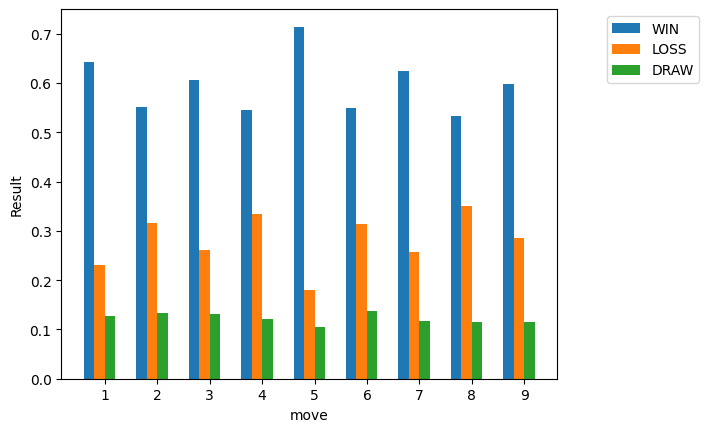

In [13]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os 
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import os
import Stat_functions as sf
if __name__ == "__main__":
# Define the name of the file
    repertoire_courant = os.getcwd()

    nom_fichier_csv = "tictactoe.csv"
    # Obtenez le chemin complet du fichier CSV en utilisant os.path.join pour concaténer le dossier actuel avec le nom du fichier
    chemin_fichier_csv = os.path.join(repertoire_courant, nom_fichier_csv)
    with open(chemin_fichier_csv, "r", newline="") as file:
        data = pd.read_csv(chemin_fichier_csv, delimiter=';', encoding='utf-8', header=0)
        # Charger les données depuis votre fichier ou source de données
        
        # Création d'un dictionnaire de mapping numérique pour les positions
        position_mapping = {
            "?" : 0,
            "(0, 0)": 1,
            "(0, 1)": 2,
            "(0, 2)": 3,
            "(1, 0)": 4,
            "(1, 1)": 5,
            "(1, 2)": 6,
            "(2, 0)": 7,
            "(2, 1)": 8,
            "(2, 2)": 9,
            # "win": 10,
            # "loss": 11,
            # "draw":12
        }

        # Transformation des coordonnées en valeurs numériques
        for col in data.keys():
            if col != 'RESULT':
                data[col] = [position_mapping[m] if m in position_mapping else position_mapping['?'] for m in data[col]]
            """else:
                data[col] = [position_mapping[result] for result in data[col]]"""
        # Diviser les données en caractéristiques (X) et étiquettes (Y)
        X = data.iloc[:, :-1]  # Sélectionnez toutes les colonnes sauf la dernière (les résultats)
        Y = data.iloc[:, -1]   # Sélectionnez la dernière colonne (les résultats)
        # Diviser les données en ensembles d'entraînement et de test
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
        
        
        # Créer et entraîner le modèle
        model = DecisionTreeClassifier()
        model.fit(X_train, y_train)

        # Prédiction sur l'ensemble de test
        predictions = model.predict(X_test)

        # Évaluation de la précision du modèle
        accuracy = accuracy_score(y_test, predictions)
        print("Accuracy:", accuracy)

        stock = sf.winrate_first(data)
        win = [t[0] for t in stock]
        loss = [t[1] for t in stock]
        draw = [t[2] for t in stock]
        plt.bar(range(len(position_mapping.values())-1), win, width=0.2, label='WIN')
        plt.bar([i + 0.2 for i in range(len(position_mapping.values())-1)], loss, width=0.2, label='LOSS')
        plt.bar([i + 0.4 for i in range(len(position_mapping.values())-1)], draw, width=0.2, label='DRAW')

        plt.xlabel('move')
        plt.ylabel('Result')
        plt.xticks([i + 0.3  for i in range(len(position_mapping)-1)], [x for x in position_mapping.values() if x != 0])
        plt.legend(loc="upper right", bbox_to_anchor=(1.30, 1))

